In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
# from google.colab import files


# Useful links

**numpy** https://www.numpy.org/

**pandas** https://pandas.pydata.org/

**matplotlib** https://matplotlib.org/

**colab** https://colab.research.google.com/notebooks/welcome.ipynb![alt text](https://)

# **Getting the data**
The data is released by Open Power System Data plateforme under Creative Commons Attribution-International license, based on consumptuon and production of several German small business households.


In [3]:
link = "https://bit.ly/2L5Kof1"

In [4]:
uploaded = files.upload()

NameError: name 'files' is not defined

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['2021_Building_Energy_Benchmarking.csv']))

NameError: ignored

In [ ]:
print(f"Dataset has {data.shape[0]} observations (samples) and "
      f"{data.shape[1]} features")

In [ ]:
data.head()

In [ ]:
data.tail(10)

# Handling missing values



In [ ]:
print("length of dataframe without rows where all values are NA is {} \n that represents {} of initial dataset \n".format(len(data.dropna(how="all").index),len(data.dropna(how="all").index)/len(data.index)))
print("length of dataframe without rows where at least one value is NA is {} \n that represents {} of initial dataset".format(len(data.dropna(how="any").index),len(data.dropna(how="any").index)/len(data.index)))

In [ ]:
data.describe()

In [ ]:
 for col, row in data.items():
  print("First non NaN value for column '{}' is at index {}".format(col, row.first_valid_index()))

In [ ]:
 for col, row in data.items():
    print("Last non null value for column '{}' is at index {}".format(col, row.last_valid_index()))

In [ ]:
# On enlève les colonnes vides et les colonnes inutiles à notre étude (colonnes
# avec valeurs uniques ou avec redondance)
full_data_1 = data.drop(['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','DataYear',
                       'TaxParcelIdentificationNumber', 'City','Address', 'State',
                       'Latitude','Longitude','ZipCode','CouncilDistrictCode',
                       'PropertyGFABuilding(s)','PropertyGFAParking','SiteEUIWN(kBtu/sf)',
                       'SiteEnergyUseWN(kBtu)','SourceEUIWN(kBtu/sf)'
                       ],axis=1)
full_data_1.head(10)

# Missing values rate per feature


In [ ]:
def compute_missing_rate(df):
  missing_rate = df.isnull().sum() / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'missing_rate': missing_rate})
  missing_value_df.sort_values('missing_rate', ascending = False, inplace=True)
  return missing_value_df

In [ ]:
compute_missing_rate(data)
# prédire energystarscore peut être un bon objectif

,column_name,missing_rate
ThirdLargestPropertyUseType,ThirdLargestPropertyUseType,0.815998
ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,0.815998
SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,0.477750
SecondLargestPropertyUseType,SecondLargestPropertyUseType,0.477750
ENERGYSTARScore,ENERGYSTARScore,0.303030
SourceEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),0.080808
SiteEnergyUseWN(kBtu),SiteEnergyUseWN(kBtu),0.080808
SiteEUIWN(kBtu/sf),SiteEUIWN(kBtu/sf),0.080808
SiteEUI(kBtu/sf),SiteEUI(kBtu/sf),0.074802
SourceEUI(kBtu/sf),SourceEUI(kBtu/sf),0.074802


# Help yourself with visualization 


In [ ]:
full_data.head(10)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2021.0,MAYFLOWER PARK HOTEL,NonResidential,659000030.0,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,...,88434.0,944955.0,1798672.0,14876.0,Compliant,No Issue,3224187.0,1487618.0,241.6,2.7
1,2,2021.0,PARAMOUNT HOTEL,NonResidential,659000220.0,724 PINE ST,SEATTLE,WA,98101.0,47.61307,...,88502.0,657478.0,0.0,23738.0,Compliant,No Issue,2243315.0,2373789.0,135.4,1.5
2,3,2021.0,WESTIN HOTEL (Parent Building),NonResidential,659000475.0,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,945349.0,8673722.0,10583473.0,37750.0,Compliant,No Issue,29594739.0,3775000.0,1201.4,1.6
3,5,2021.0,HOTEL MAX,NonResidential,659000640.0,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,...,61320.0,509497.0,1167770.0,19676.0,Compliant,No Issue,1738403.0,1967580.0,208.6,3.4
4,8,2021.0,WARWICK SEATTLE HOTEL,NonResidential,659000970.0,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,123445.0,1333597.0,0.0,68087.0,Compliant,No Issue,4550233.0,6808702.0,380.4,3.3
5,9,2021.0,WEST PRECINCT (SEATTLE POLICE),Nonresidential COS,660000560.0,810 VIRGINIA ST,SEATTLE,WA,98101.0,47.61623,...,50755.0,1951866.0,0.0,31727.0,Compliant,No Issue,6659767.0,3172654.0,196.1,3.3
6,10,2021.0,CAMLIN WORLDMARK HOTEL,NonResidential,660000825.0,1619 9TH AVE,SEATTLE,WA,98101.0,47.61390,...,83008.0,744720.0,0.0,28625.0,Compliant,No Issue,2540985.0,2862470.0,162.5,2.0
7,11,2021.0,PARAMOUNT THEATER,NonResidential,660000955.0,901 PINE ST,SEATTLE,WA,98101.0,47.61327,...,102761.0,758790.0,4248573.0,4250.0,Compliant,No Issue,2588992.0,425020.0,385.9,3.8
8,12,2021.0,COURTYARD BY MARRIOTT - PIONEER SQ,NonResidential,939000080.0,612 2ND AVE,SEATTLE,WA,98104.0,47.60294,...,163984.0,1662709.0,0.0,66045.0,Compliant,No Issue,5673163.0,6604500.0,374.2,2.3
9,13,2021.0,LYON BUILDING,Multifamily MR (5-9),939000105.0,607 3RD AVE,SEATTLE,WA,98104.0,47.60284,...,38407.0,724208.0,1413117.0,7472.0,Compliant,No Issue,2470997.0,747176.0,167.2,2.7


In [ ]:
def plot_df(df, title):
  df.plot(title=(title), y= ['ENERGYSTARScore','BuildingName'])
  plt.xlabel('BuildingName')
  plt.ylabel('ENERGYSTARScore')
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

In [ ]:
def plot_df_choix_colonnes(df, title, y, x):
  df.plot(title=(title), y= [y,x])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()


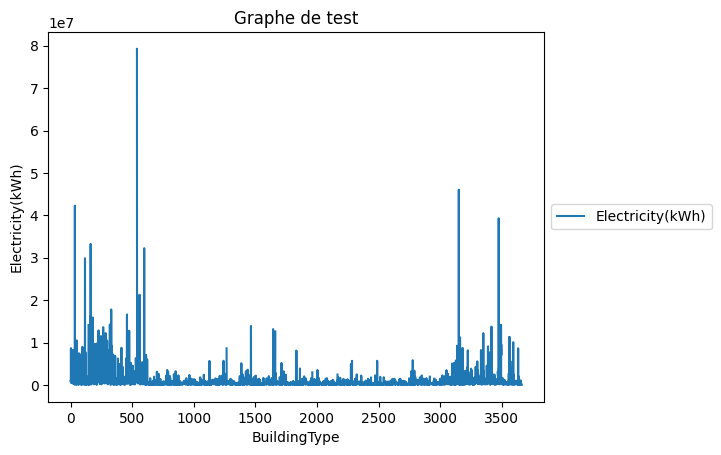

In [ ]:
plot_df_choix_colonnes(data, "Graphe de test","Electricity(kWh)","BuildingType")
# on observe des valeurs de consommations aberrantes

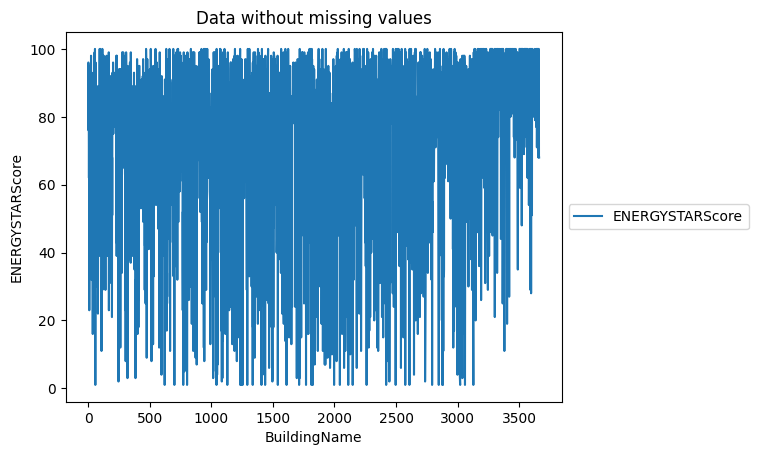

In [ ]:
plot_df(clean_df, "Data without missing values")

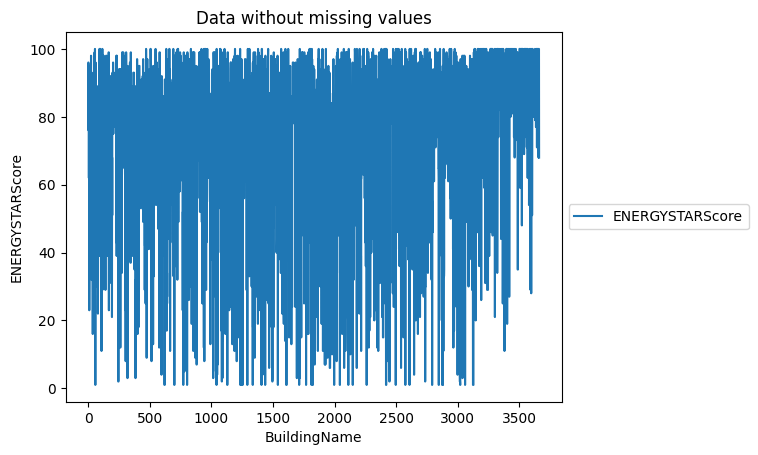

In [ ]:
plot_df(clean_df_2, "Data without missing values")

In [ ]:
clean_df.to_csv("df_without_missing_values.csv")
files.download("df_without_missing_values.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#En dessous c'est le reste du TP1 ça sert pas à grand chose


# Create three functional dataframes : consumption, production and grid import and convert them to original (not cumulative values)


In [ ]:
data.columns




Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [ ]:
consumption_df = clean_df[['offices', 'chemistry_room', 'clean_room',
       'printing_room', 'printing_room.1', 'compressor', 'cooling_aggregate',
       'cooling_pumps', 'dishwasher', 'electric_vehicle',
       'facility_cvd_centrotherm', 'facility_diffusion_centrotherm',
       'facility_diffusion_tecnofirmes', 'facility_furnace_centrotherm',
       'facility_indus_rena', 'refrigerator',
       'ventilation']].diff()
production_df = clean_df[['solar_production','solar_production_facade', 'solar_production_roof']].diff()
grid_import_df = clean_df[['grid_import']].diff()

<Axes: >

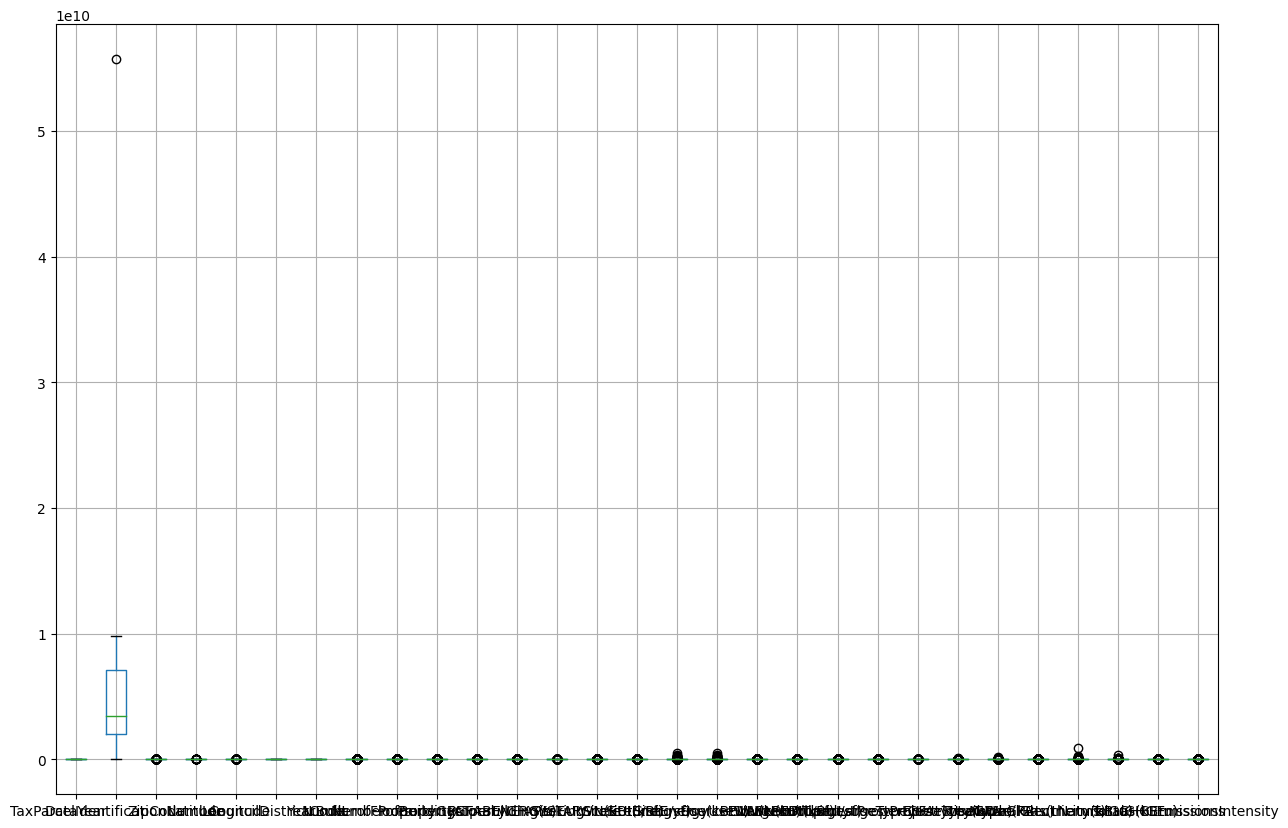

In [ ]:
data_show.boxplot(figsize=(15,10))

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


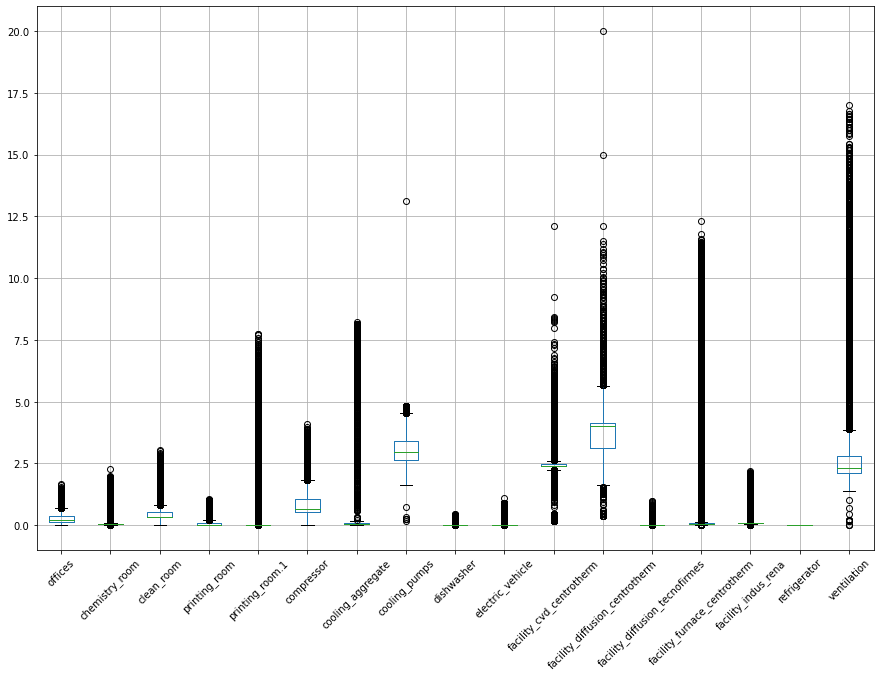

In [ ]:
consumption_df.boxplot(rot=45, figsize=(15,10))

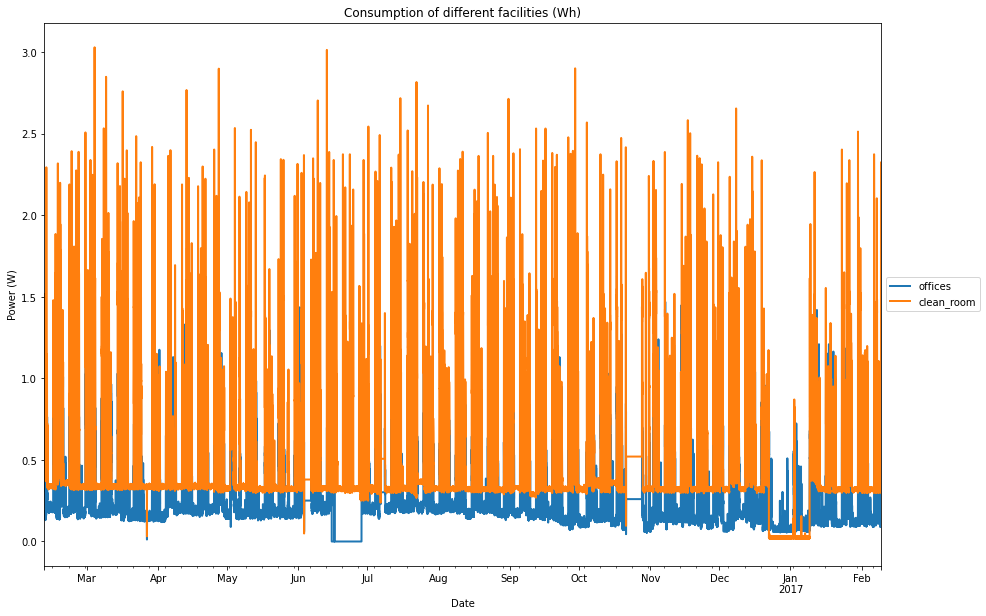

In [ ]:
plot_df(consumption_df, "Consumption of different facilities (Wh)")

To improve visualisation of multiple features, plot one feature by subplot with plot_multiple_features function

In [ ]:
def plot_multiple_features(df, subplots, fig_w, fig_h):
  fig, axes = plt.subplots(subplots,subplots,figsize = (fig_w, fig_h))
  for column, ax in zip(df.columns, axes.flatten()):
    df[[column]].plot(ax=ax, title=column, fontsize = 18)
    ax.tick_params(axis='x',labelsize=4)
    ax.tick_params(axis='y',labelsize=4, labelrotation=75)
    ax.xaxis.label.set_visible(False)
 

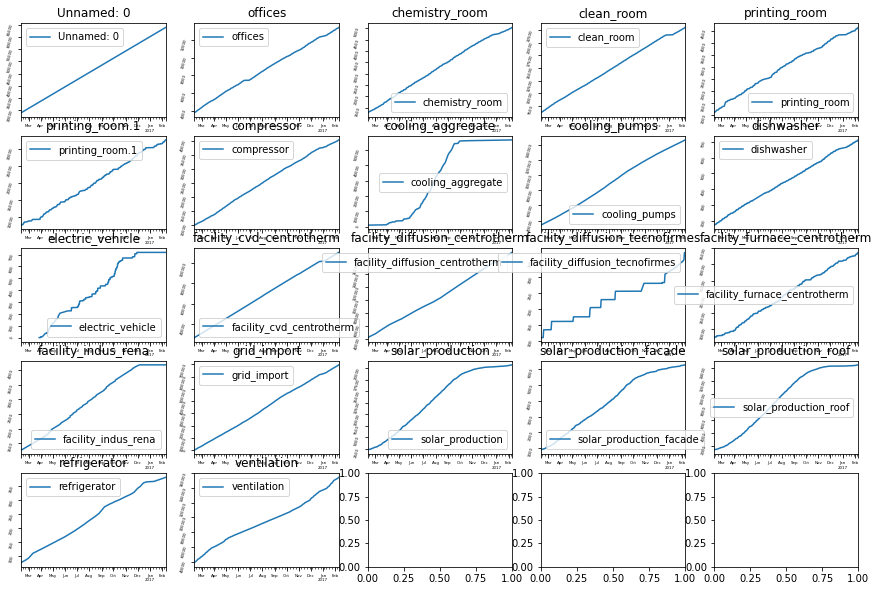

In [ ]:
plot_multiple_features(clean_df, 5, 15, 10)

# Handling outliers


In [ ]:
consumption_df.describe()

,offices,chemistry_room,clean_room,printing_room,printing_room.1,compressor,cooling_aggregate,cooling_pumps,dishwasher,electric_vehicle,facility_cvd_centrotherm,facility_diffusion_centrotherm,facility_diffusion_tecnofirmes,facility_furnace_centrotherm,facility_indus_rena,refrigerator,ventilation
count,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,30619.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000,34946.000000
mean,0.276542,0.107668,0.486597,0.100989,0.714905,0.869344,1.594896,3.209513,0.015415,0.023451,2.405530,3.747280,0.007699,0.759553,0.083574,0.008686,3.318644
std,0.214747,0.183769,0.363226,0.202323,1.755611,0.652173,2.953660,0.612491,0.057420,0.121995,0.545331,0.909684,0.041105,2.035767,0.148546,0.008019,2.477058
min,0.000000,0.000000,0.019000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.000000,0.156000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145000,0.040000,0.320000,0.000000,0.000000,0.547000,0.031000,2.656000,0.000000,0.000000,2.376000,3.125000,0.000000,0.062000,0.078000,0.001000,2.126000
50%,0.191000,0.045000,0.334000,0.010000,0.000000,0.641000,0.062000,2.969000,0.000000,0.000000,2.407000,4.000000,0.000000,0.063000,0.084000,0.007000,2.313000
75%,0.366000,0.060000,0.520839,0.080000,0.000000,1.062000,0.094000,3.406000,0.001000,0.000000,2.469000,4.126000,0.000000,0.094000,0.086000,0.017000,2.813000
max,1.675000,2.270000,3.031000,1.040000,7.758000,4.079000,8.204000,13.126000,0.470000,1.099000,12.094000,20.000000,0.991000,12.297000,2.176000,0.028000,17.000000


# What type of methods for handling outliers ?

In [ ]:
def where_arbitrary_quantile(df, percent):
  high_quantile = df.quantile(percent)
  high_outliers = (df > high_quantile)
  return df.where(~high_outliers, high_quantile, axis=1)


def where_iqr(df):
  q_25 = df.quantile(0.25)
  q_75=df.quantile(0.75)
  iqr=q_75-q_25
  high_quantile = q_75+iqr*1.5
  high_outliers = (df>q_75+iqr*1.5)
  return df.where(~high_outliers, high_quantile, axis=1)

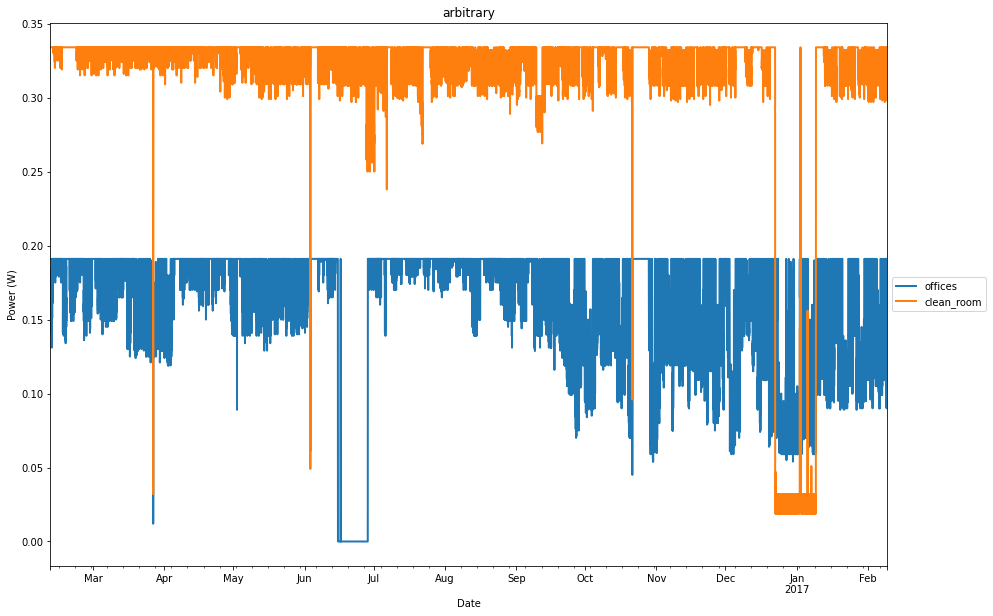

In [ ]:
arbitrary_df=where_arbitrary_quantile(consumption_df, 0.5)
plot_df(arbitrary_df,"arbitrary")


# Let's create global metrics and analyze them

In [ ]:
production_wo_outliers['global_production'] = 
production_wo_outliers

In [ ]:
consumption_wo_outliers = 

In [ ]:
grid_import_wo_outliers = 

In [ ]:
consumption_wo_outliers['global_consumption'] = 

In [ ]:
global_df = 
global_df.head()

,global_consumption,global_production,grid_import
timestamp,,,
2016-02-11 10:30:00+00:00,29.902,2.409,31.75
2016-02-11 10:45:00+00:00,34.256,2.685,36.00
2016-02-11 11:00:00+00:00,33.159,2.865,34.25
2016-02-11 11:15:00+00:00,30.338,2.988,32.50
2016-02-11 11:30:00+00:00,33.467,3.055,34.75


#Plot relationships between different features of dataframe

In [ ]:
import seaborn as sns
dist = sns.pairplot(global_df)
dist.fig.set_size_inches(12,12)

In [ ]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.distplot(global_df['global_consumption'].fillna(0), hist=True, kde=False, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5, 'shade': True})
sns.distplot(global_df['grid_import'].fillna(0), hist=True, kde=False, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5, 'shade': True})

In [ ]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.distplot(global_df['global_consumption'].fillna(0), hist=False, kde=True, color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5, 'shade': True})
sns.distplot(global_df['grid_import'].fillna(0), hist=False, kde=True, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5, 'shade': True})

# Time series analysis
## Stationarity of time series data

**statsmodels** https://www.statsmodels.org/

In [ ]:
global_consumtion_daily = global_df[['global_consumption']].resample('d').mean().fillna(method="bfill")

In [ ]:
global_consumtion_daily

,global_consumption
timestamp,
2016-02-11 00:00:00+00:00,26.462333
2016-02-12 00:00:00+00:00,16.263229
2016-02-13 00:00:00+00:00,11.846240
2016-02-14 00:00:00+00:00,11.843146
2016-02-15 00:00:00+00:00,18.551052
...,...
2017-02-05 00:00:00+00:00,12.239323
2017-02-06 00:00:00+00:00,21.993255
2017-02-07 00:00:00+00:00,22.390193


In [ ]:
ma =  global_consumtion_daily.rolling(30).mean()
mstd = global_consumtion_daily.rolling(30).std()

plt.plot(global_consumtion_daily, color = 'blue', label = "Original value")
plt.plot(ma, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

In [ ]:
data_to_plot=global_df['global_consumption'].resample('H').mean().fillna(method="bfill")['2017-01-01 00:00:00':'2017-01-14 00:00:00']
ma =  data_to_plot.rolling(24).mean()
mstd =  data_to_plot.rolling(24).std()

plt.plot(data_to_plot, color = 'blue', label = "Original value")
plt.plot(ma, color= 'red',  label = "Rolling mean")
plt.plot(mstd, color= 'green',  label = "Rolling std")
plt.legend()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
consumption_decomposed= sm.tsa.seasonal_decompose(global_consumtion_daily)
fig = consumption_decomposed.plot()
plt.show()

In [ ]:
consumption_decomposed

# Simplest predictive modeling

In [ ]:
rolling_mean = global_consumtion_daily["global_consumption"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].rolling(14).mean().shift(1)
plt.plot(rolling_mean, "g", label="Rolling mean")
plt.plot(global_consumtion_daily["global_consumption"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'][14:], label="Actual values")
plt.legend(loc="best")

In [ ]:
global_consumtion_daily['prediction'] = global_consumtion_daily["global_consumption"]['2016-02-11 10:15:00':'2017-01-01 00:00:00'].rolling(14).mean().shift(1)
global_consumtion_daily[15:].head(20)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
test = global_consumtion_daily['global_consumption']['2016-12-01 00:00:00':'2017-01-01 10:45:00']
prediction =  global_consumtion_daily['prediction']['2016-12-01 00:00:00':'2017-01-01 10:45:00']
print("R2 score is {}".format(r2_score(test.values, prediction.values)))
print("MSE score is {}".format(mean_squared_error(test.values, prediction.values)))
print("MAE score is {}".format(mean_absolute_error(test.values, prediction.values)))

# Feature engineering and prediction with machine learning algorithms


In [ ]:
dataset = global_consumtion_daily[["global_consumption"]]
dataset.columns = ["target"]
for i in range(7, 14):
    dataset["t-{}".format(i)] = dataset.target.shift(i)
dataset.head(15)

In [ ]:
dataset=dataset.iloc[13:]
dataset.head()

In [ ]:
dataset["weekday"] = dataset.index.weekday
dataset['weekend'] = dataset.weekday.isin([5,6])*1
dataset.head()

,target,t-7,t-8,t-9,t-10,t-11,t-12,t-13,weekday,weekend
timestamp,,,,,,,,,,
2016-02-24 00:00:00+00:00,16.660406,18.373552,20.682383,18.551052,11.843146,11.846240,16.263229,26.462333,2,0
2016-02-25 00:00:00+00:00,15.560219,22.703461,18.373552,20.682383,18.551052,11.843146,11.846240,16.263229,3,0
2016-02-26 00:00:00+00:00,19.197583,15.661969,22.703461,18.373552,20.682383,18.551052,11.843146,11.846240,4,0
2016-02-27 00:00:00+00:00,11.959687,12.086052,15.661969,22.703461,18.373552,20.682383,18.551052,11.843146,5,1
2016-02-28 00:00:00+00:00,11.887594,12.568146,12.086052,15.661969,22.703461,18.373552,20.682383,18.551052,6,1


In [ ]:
train, test = dataset['2016-02-11 10:15:00':'2017-01-01 00:00:00'].fillna(0), dataset['2017-01-01 00:00:00':'2017-02-09 10:45:00'].fillna(0)

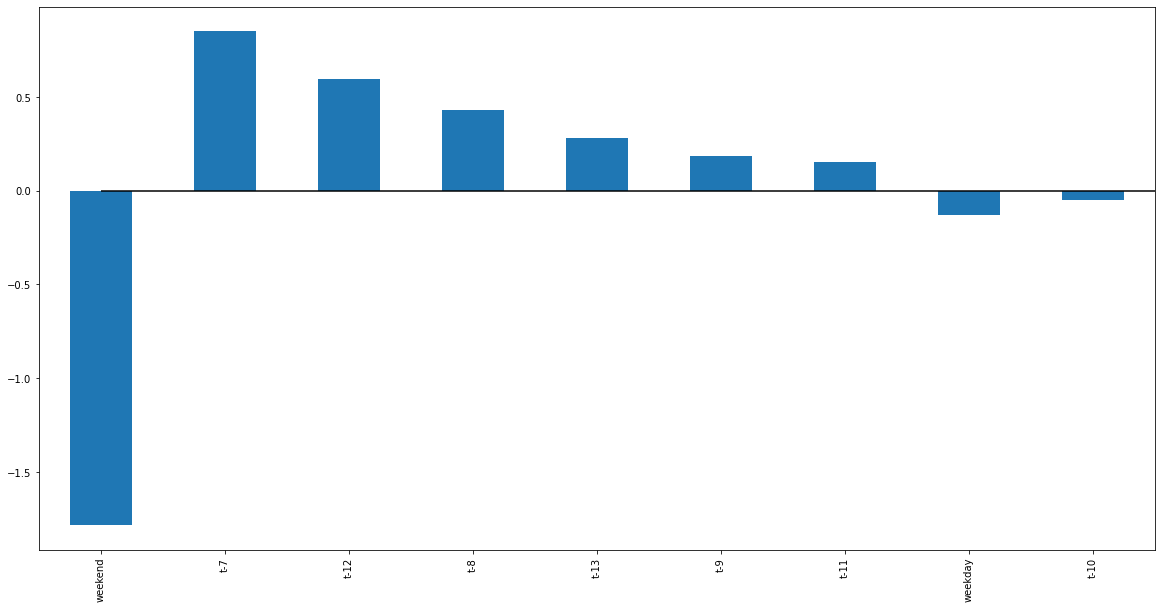

In [ ]:
features_weights = pd.DataFrame(data=model.coef_, index = train.drop(['target'], axis=1).columns)
features_weights.columns = ["weights"]
features_weights["absolute_value"] = features_weights["weights"].apply(np.abs)
features_weights = features_weights.sort_values(by="absolute_value", ascending=False).drop(["absolute_value"], axis=1)
    
features_weights['weights'].plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=len(features_weights))

# Random Forest


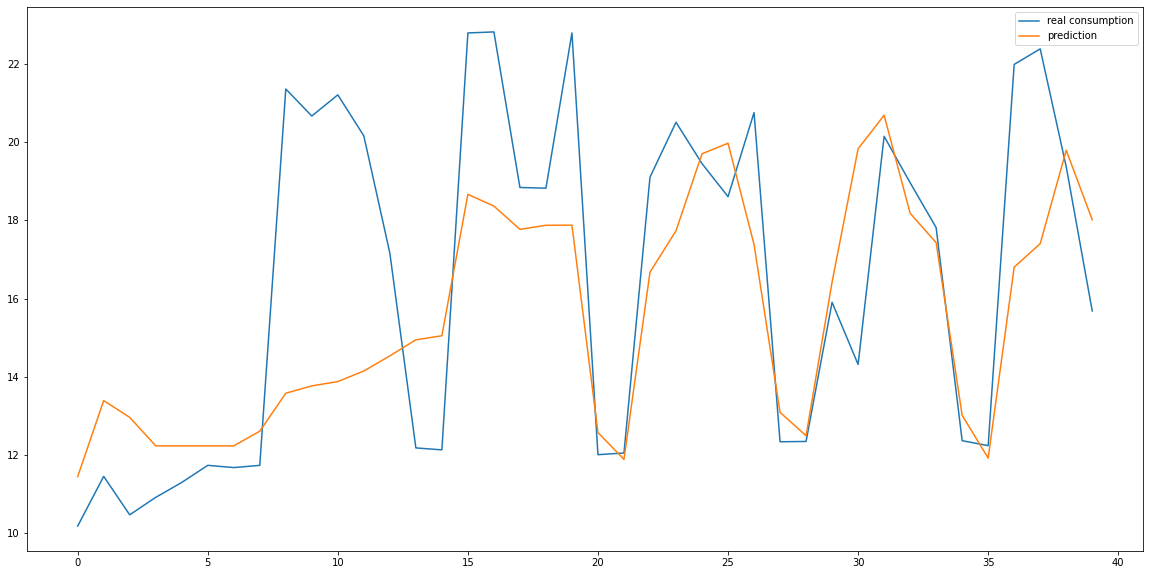

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from numpy import asarray

train_features = train.drop(['target'], axis=1, inplace=False)
train_target = train['target']
test_features =  test.drop(['target'],axis=1, inplace=False)

model_RF = RandomForestRegressor(max_depth=10, random_state=0, max_features=3, n_estimators=200)
model_RF.fit(asarray(train_features), asarray(train_target))

predictionRf = model_RF.predict(test_features)
    
plt.figure(figsize=(20, 10))
plt.plot(test['target'].values, label="real consumption")
plt.plot(predictionRf, label="prediction")
plt.legend()